## Link to data:
 https://clinecenter.illinois.edu/project/research-themes/democracy-and-development/coup-detat-project-cdp

### Contents of this notebook
- Introduction to Project
- Variables list
- Preparing the Data
- Choosing our Response variable
- Missing Data 
- Preliminary Visuals
- Exploration of Potential Interests
- Model Selection
    - Predictor Pre Selection
    - Lasso penalization
    - Logistic Regression
    - Random Forest
    - Adaboost





## Introduction to our Project
Our project looks at the Coup d'etats around the world across different years. Our data comes from the Cline Center from the University of Illinois Urbana-Champaign. The link to the website and data is: https://clinecenter.illinois.edu/project/research-themes/democracy-and-development/coup-detat-project-cdp

From the Cline Center website, a coup is labeled as "organized efforts to effect sudden and irregular(e.g. illegal or extra-legal) removal of the incumbent executive authority of a national government, or to displace the authority of the highest levels of one or more branches of the government." A coup is considered to be realized or unrealized. A realized coup would be a success in the removal of the incumbents or the removal of the incumbents ability to control the state. An unrealized coup is considered to be a conspiracy or an attempted coup, meaning an unsuccessful removal of an incumbent's power. Please note that we will be using realized coup or success or coup interchangeably to mean a success. Also note, that a coup technically includes conspiracies or attempts but these will be described as either unrealized, unsuccessful or as they are mentioned.



## Dataset 

The dataset contains the following columns: 

- `coup_id` - Unique number assigned to each event. It consists of the country’s cowcode and the eight digit date of the event in MMDDYYYY.
- `cowcode` - A unique country code number based on the Correlates of War (COW) country code list4. It is used to identify the country where a coup event occurred. Please note, these codes are slightly different from
- `country` - Name of the country where the coup event occured 
- `year` -  Year of the coup event.
- `month` -  Month of the coup event.
- `day` -  Day of the coup event. 
- `event_type` - Indicates whether the event is a coup, attempted coup, or conspiracy.
- `unrealized` -  A dummy variable where one indicates an unsuccessful coup or plot and zero otherwise.
- `realized` -  A dummy variable where one indicates a successful coup and zero otherwise.
- `conspiracy` - A dummy variable where one indicates a coup conspiracy thwarted prior to execution and zero otherwise.
- `attempt` -  A dummy variable where one indicates a coup was attempted by failed and zero otherwise.
- `military` - A dummy variable where one indicates a military coup/attempt/conspiracy and zero otherwise.
- `dissident` - A dummy variable where one indicates a dissident coup/attempt/conspiracy and zero otherwise.
- `rebel` - A dummy variable where one indicates a rebel coup/attempt/conspiracy and zero otherwise.
- `palace` - A dummy variable where one indicates a palace coup/attempt/conspiracy and zero otherwise.
- `foreign` - A dummy variable where one indicates a foreign-backed coup/attempt/conspiracy and zero otherwise.
- `auto` - A dummy variable where one indicates an auto coup and zero otherwise.
- `resign` - A dummy variable where one indicates a forced resignation and zero otherwise
- `popular` - A dummy variable where one indicates a popular revolt and zero otherwise.
- `counter` - A dummy variable where one indicates a counter-coup and zero otherwise.
- `other` - A dummy variable where one indicates the coup event does not fit into any of the above categories or the actors were not identified and zero otherwise.
- `noharm` - A dummy variable where one indicates the deposed executive was not harmed during the coup event and zero otherwise.
- `injured` - A dummy variable where one indicates the deposed executive was injured during the coup event and zero otherwise.
- `killed` -  A dummy variable where one indicates the deposed executive was killed during the coup event and zero otherwise.
- `harrest` - A dummy variable where one indicates the deposed executive was placed under house arrest and zero otherwise.
- `jailed` -  A dummy variable where one indicates the deposed executive was jailed and zero otherwise.
- `tried` - A dummy variable where one indicates the deposed executive was tried and zero otherwise.
- `fled` - A dummy variable where one indicates the deposed executive fled the country and zero otherwise.
- `exile` - A dummy variable where one indicate the deposed executive was banished from the country and zero otherwise.

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



## Preparing the data

- Creating a response variable Success based off of event type, which classifies the event as a coup, conspiracy, or attempted.
- Success gives a 1 if there was a coup and a 0 for a conspiracy or attempt
- Gather a list of the countries with coups and their success rates
- Find a country with the most coups (not the rate of success)

In [3]:
coup_df = pd.read_csv('Coupdata.csv')


In [4]:
coup_df.head()

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
0,43910302014,439,Burkina Faso,2014,10,30,coup,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,51605132015,516,Burundi,2015,5,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,48304132006,483,Chad,2006,4,13,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,65102112011,651,Egypt,2011,2,11,coup,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,65107032013,651,Egypt,2013,7,3,coup,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [5]:
all_variables = coup_df.columns.values.tolist()
#print(f"Total number of variables:{len(all_variables)}")
#all_variables

### Choosing our Response Variable: 
We decided to use the column realized as our response variable that is based off of event type. Event type has three categories (coup, attempted, conspiracy). This  column in the dataframe will be based off the event_type column and will create a list of 1s or 0s to signify whether a coup was successful (1) or unsuccesful (0). The unrealized column is the exact opposite which shows failures as (1) and successes as (0). Since unrealized is the exact opposite we will drop this from the list of chosen predictors.

In [6]:
event_types = coup_df.event_type.unique()
print("The metrics used to determine a successful coup:", event_types)
print("If the event type is a coup it counts as a real or a 1 whereas attempted and conspiracy are considered a unrealized coup given a 0.")



The metrics used to determine a successful coup: ['coup' 'attempted' 'conspiracy']
If the event type is a coup it counts as a real or a 1 whereas attempted and conspiracy are considered a unrealized coup given a 0.


In [7]:
features = list(coup_df.columns)

## Should decide if what data types we have

## Checking for Missing Data

We will explore whether or not the dataframe is missing any data for any of the predictors so we can decide our imputation means. Our data looks to not have any missing data!

In [8]:
coup_df.isna().sum()

coup_id       0
cowcode       0
country       0
year          0
month         0
day           0
event_type    0
unrealized    0
realized      0
conspiracy    0
attempt       0
military      0
dissident     0
rebel         0
palace        0
foreign       0
auto          0
resign        0
popular       0
counter       0
other         0
noharm        0
injured       0
killed        0
harrest       0
jailed        0
tried         0
fled          0
exile         0
dtype: int64

## Preliminary Visuals
This will analyze the predictors that were selected and tested from the model selection. We will do multiple methods of evaluating these predictors and their affect on the response variable. This will include plotting how each predictor's presence impacted the outcome of the coup. This can also help use reduce the list of predictors if we see any weird plots.

### Subplots showing the chosen categorical variables vs Event type variable

Predictors: ['country','year','military','dissident','rebel','palace', 'foreign','auto','resign','popular','counter', 'other','noharm','injured','killed','arrest',
 'jailed','tried','fled','exile']. 
 
We are not going to plot coup_id or cowcode because they are unique identifiers to each country. Unrealized will also not be plotted since its the exact opposite as our response. We also removed attempt and consipiracy columns because they are in the event_type variable. We decided to use event type vs realized here because it shows more information as to the types of coups that were attemped and could give insights as to what predictors affect the different types of coups. We also removed unrealized since it is the opposite of realized and is also captured in event type.

** Note** for each predictor a 0 indicates the lack or presence whereas a 1 indicates the presence of that variable in a coup, attempt or conspiracy.
**Note** Country and Year will be evaluated separated to see what potential information we can find across each country and all years.


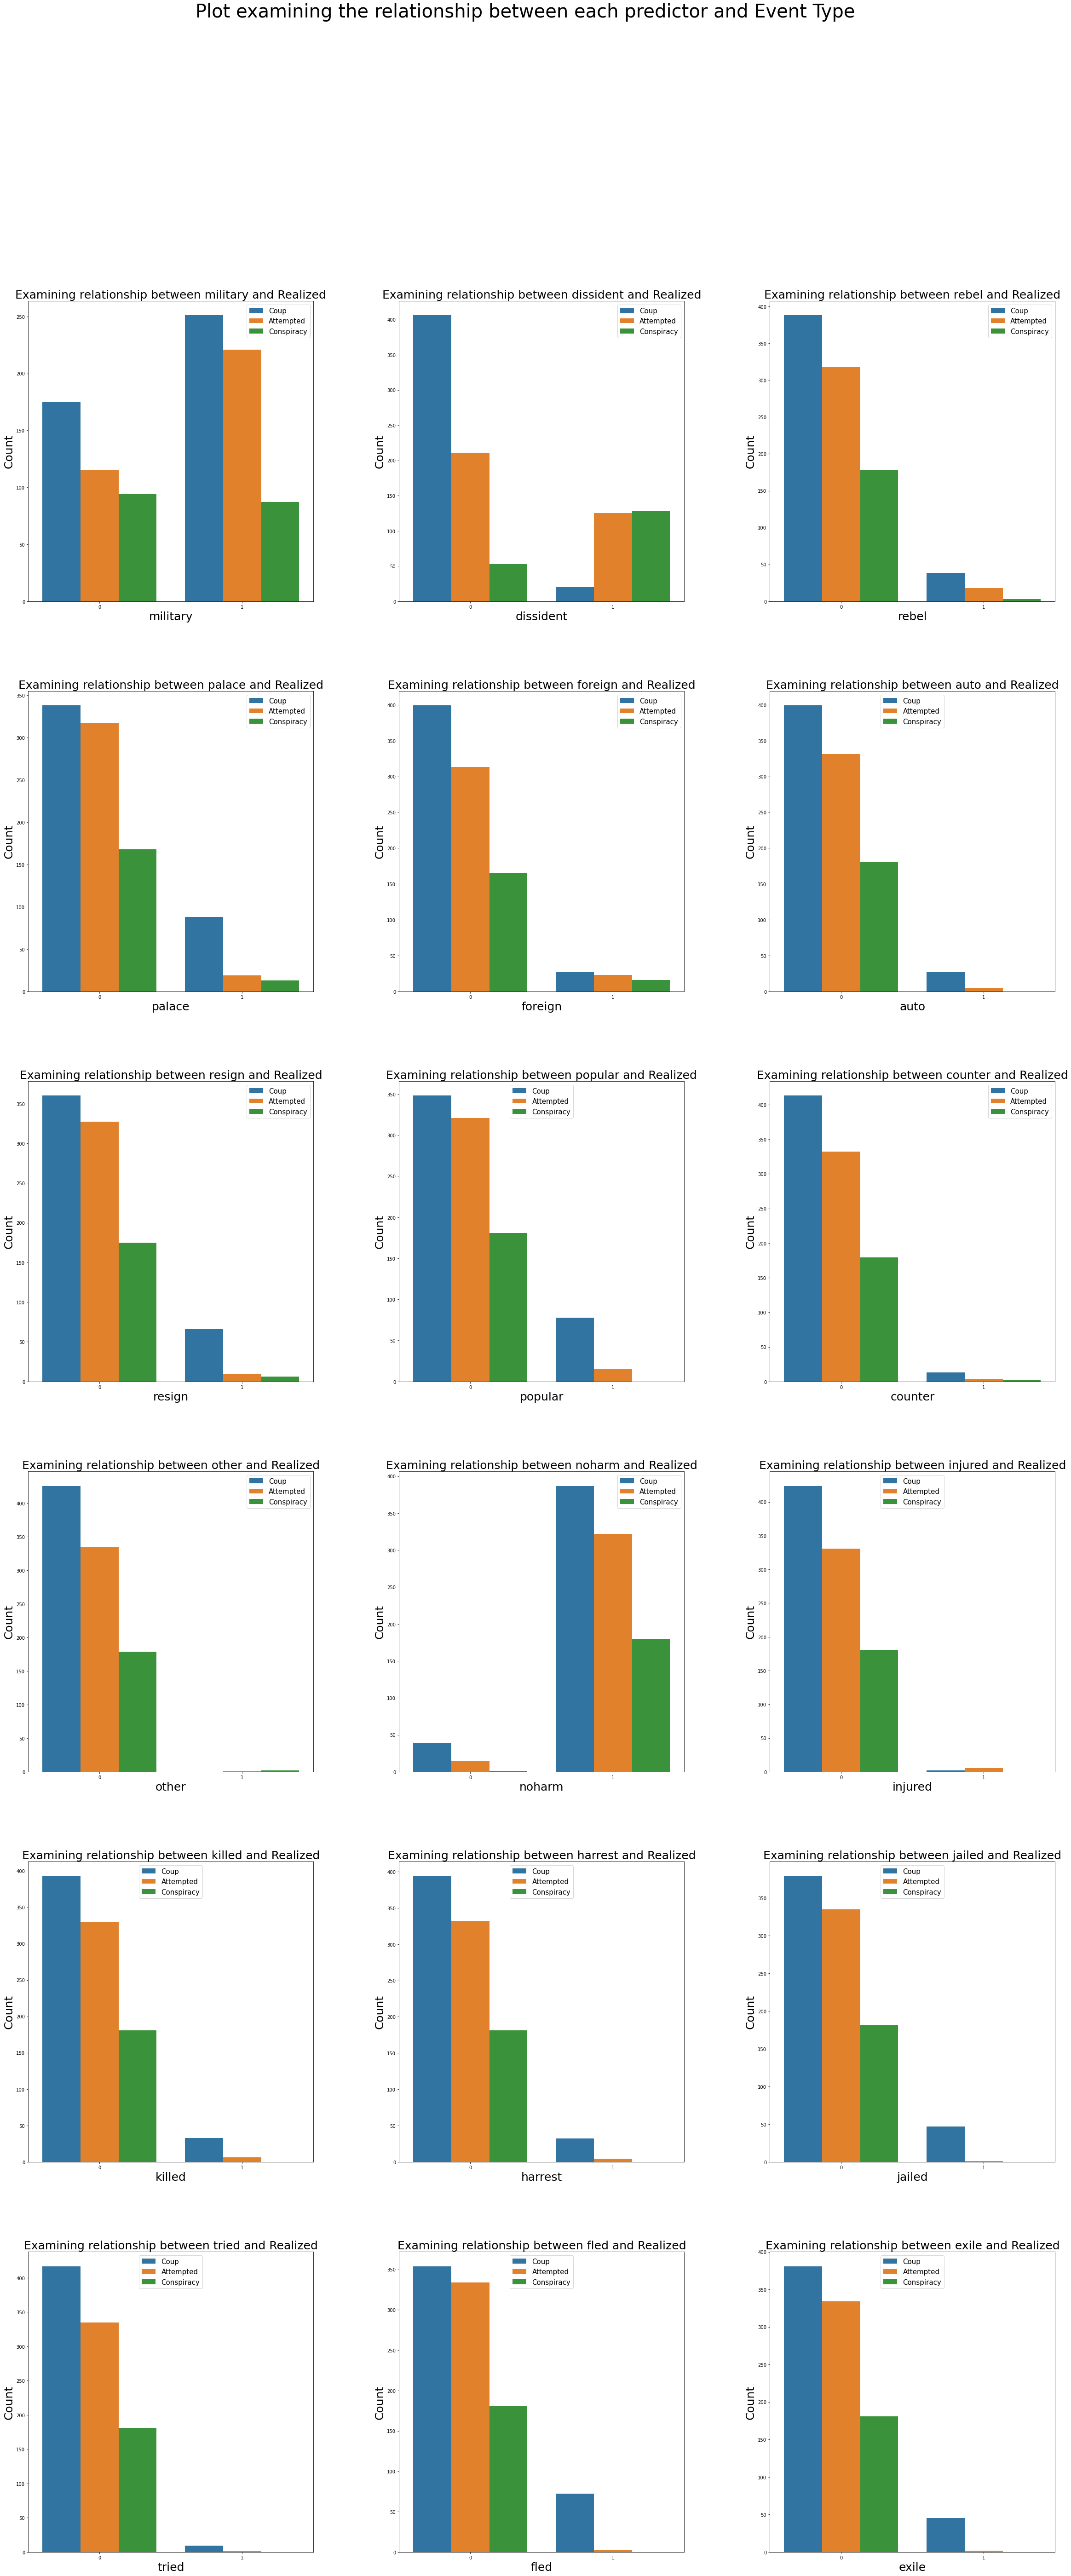

In [9]:
fig, axs = plt.subplots(6,3, figsize = (40, 90))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axs = axs.flatten()

response = coup_df['event_type']
predictors = ["country","year","month","day","military","dissident","rebel",
"palace","foreign","auto","resign","popular","counter","other","noharm","injured","killed","harrest"
,"jailed","tried","fled","exile"]
# print(len(predictors))
# 22 predictors


#this doesn't include country and year. Will do seperate LARGE plot for those
plt.suptitle("Plot examining the relationship between each predictor and Event Type", fontsize = 40)

for i in range(0,18):
    pred = predictors[i+4]
    ax = sns.countplot(ax=axs[i], x=predictors[i+4], hue=response, data=coup_df)
    axs[i].set_title(f"Examining relationship between {pred} and Realized", fontsize = 25)
    axs[i].set_ylabel("Count", fontsize = 25)
    axs[i].set_xlabel(f"{pred}", fontsize = 25)
    axs[i].legend(["Coup", "Attempted", "Conspiracy"], fontsize =15)




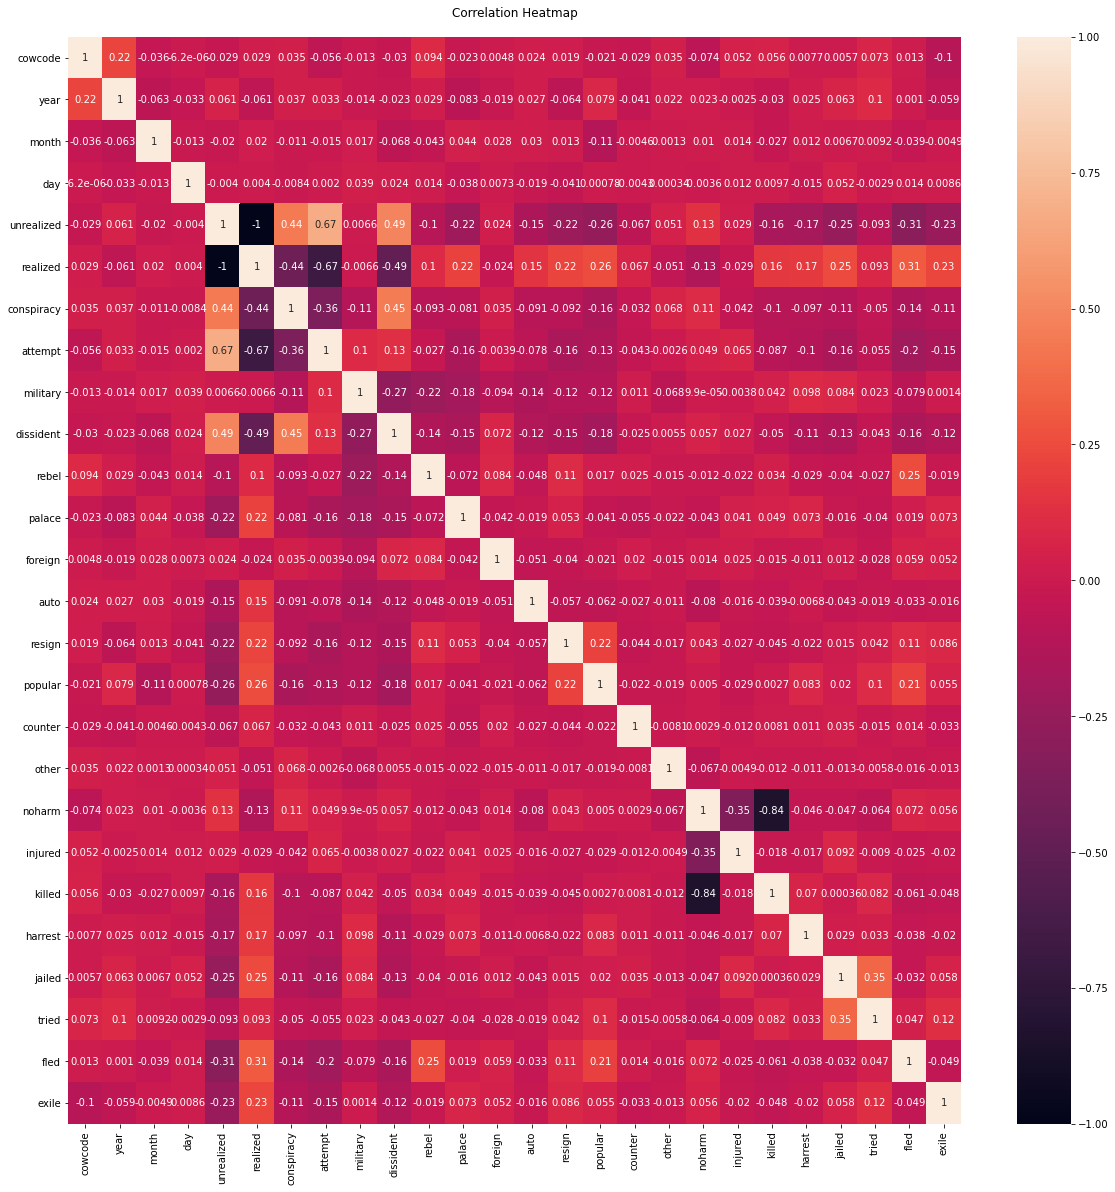

In [10]:
# Correlation between different variables
correlation_matrix = coup_df.corr()

# Increase the size of the heatmap.
plt.figure(figsize=(20, 20))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=20);

In [11]:
#### Correlation Check 
greater = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values > .99)) if i > j]
lower = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values < - .99)) if i > j]
print("Correlations greater than 0.99")
for i, sen in enumerate(greater): 
    print(i+1, '-', sen)
print("")
print("Correlations less than -0.99")
for i, sen in enumerate(lower): 
    print(i+1, '-', sen)

correlation_matrix = coup_df.corr()
greater = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values > .60)) if i > j]
lower = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values < - .60)) if i > j]
print("")
print("Correlations greater than 0.30")
for i, sen in enumerate(greater): 
    print(i+1, '-', sen)
print("")
print("Correlations less than -0.30")
for i, sen in enumerate(lower): 
    print(i+1, '-', sen)

Correlations greater than 0.99

Correlations less than -0.99
1 - realized and unrealized have correlation -1.0

Correlations greater than 0.30
1 - attempt and unrealized have correlation 0.6738

Correlations less than -0.30
1 - realized and unrealized have correlation -1.0
2 - attempt and realized have correlation -0.6738
3 - killed and noharm have correlation -0.84276


## Findings 

From the graphs, you can see that some variables such as (auto, exile, flex) are skewed towards the lack of presence (0). These variables could potentially introduce correlation or problems with predicting our response variable. We will continue to explore and look at these variables as to how they might impact our dataset and model. We imagine that variables from auto on expose to the model whether or not a coup will be realized or unrealized. 


# Exploration of Potential Interests
Here we are looking at potential ways we can assess our data. While our goal is to predict or see what potentially influences the success of a coup overall, we can further break down the data to assess whether there are different predictors that are more important in certain scenarios. For example, we can group our data by geographic region or country or time frames. It could be interesting to see if for certain decades or distinguished time frames what predictors are important to a realized coup and how this can change over time. 

### Exploring the Success of each Country in the data
In this section, we will create a dictionary that will hold the count of the amount of each country's sucessful coups, attempts, conspiracies. This will be called our success dictionary. The data is a dictionary that has the countries name with associated [coups, attempts, conspiracies] values in a list.

Then we will convert the success dictionary into a dataframe and add a column that evaluates a countries success rate. Or the amount of coups over the total amount of coups, attempts, and conspiracies. 

Instead of plotting all the countries and their rates, we are looking at the countries that have the largest values for each column in the dictionary. This can be some of the countries that we decide to look deeper at when seeing what might cause their success in each of the listed columns. This can help us evaluate the information found in our coup dataset. 

In [12]:
countries = coup_df.country.unique()#### Correlation Check 
correlation_matrix = coup_df.corr()
greater = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values > .99)) if i > j]
lower = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values < - .99)) if i > j]
print("Correlations greater than 0.99")
for i, sen in enumerate(greater): 
    print(i+1, '-', sen)
print("")
print("Correlations less than -0.99")
for i, sen in enumerate(lower): 
    print(i+1, '-', sen)

correlation_matrix = coup_df.corr()
greater = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values > .60)) if i > j]
lower = [f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have correlation {round(correlation_matrix.iloc[i,j], 5)}' for i, j in zip(*np.where(correlation_matrix.values < - .60)) if i > j]
print("")
print("Correlations greater than 0.30")
for i, sen in enumerate(greater): 
    print(i+1, '-', sen)
print("")
print("Correlations less than -0.30")
for i, sen in enumerate(lower): 
    print(i+1, '-', sen)
print(len(countries))
print(len(coup_df))

Correlations greater than 0.99

Correlations less than -0.99
1 - realized and unrealized have correlation -1.0

Correlations greater than 0.30
1 - attempt and unrealized have correlation 0.6738

Correlations less than -0.30
1 - realized and unrealized have correlation -1.0
2 - attempt and realized have correlation -0.6738
3 - killed and noharm have correlation -0.84276
136
943


In [13]:
success_dict = {}

for i in countries:
    success_dict[i] = [0,0,0]

for j in range(len(coup_df)):
    if coup_df.realized[j] == 1:
        success_dict[coup_df.country[j]][0] += 1
    if coup_df.attempt[j] == 1:
        success_dict[coup_df.country[j]][1] += 1
    if coup_df.conspiracy[j] == 1:
        success_dict[coup_df.country[j]][2] += 1


success_dict 

{'Burkina Faso': [8, 0, 2],
 'Burundi': [8, 6, 1],
 'Chad': [4, 7, 3],
 'Egypt': [6, 1, 6],
 'Fiji': [4, 1, 0],
 'Guinea': [2, 5, 2],
 'Guinea-Bissau': [4, 6, 3],
 'Honduras': [7, 3, 0],
 'Lesotho': [5, 4, 1],
 'Madagascar': [4, 5, 1],
 'Maldives': [1, 2, 1],
 'Mali': [3, 3, 4],
 'Mauritania': [6, 3, 3],
 'Niger': [4, 2, 3],
 'Papua New Guinea': [0, 2, 0],
 'Sudan': [8, 9, 11],
 'Thailand': [11, 4, 4],
 'Ukraine': [1, 0, 0],
 'Algeria': [7, 2, 0],
 'East Timor': [0, 1, 0],
 'Gabon': [2, 1, 0],
 'Gambia': [1, 3, 1],
 'Nigeria': [7, 2, 6],
 'South Sudan': [0, 1, 0],
 'Tunisia': [3, 0, 2],
 'Venezuela': [4, 14, 3],
 'Yemen': [1, 1, 0],
 'Zimbabwe': [1, 1, 3],
 'Kyrgyzstan': [1, 0, 0],
 'Armenia': [0, 1, 0],
 'Laos': [7, 4, 1],
 'Libya': [2, 5, 1],
 'Montenegro': [0, 0, 1],
 'Turkey': [4, 3, 1],
 'Ivory Coast': [0, 0, 1],
 'Eritrea': [0, 1, 0],
 'Democratic Republic of the Congo': [3, 6, 0],
 'Philippines': [2, 8, 3],
 'Georgia': [2, 0, 2],
 'Ethiopia': [7, 2, 1],
 'Bahrain': [0, 0, 1],
 '

In [14]:
country_df = pd.DataFrame.from_dict(success_dict, orient = 'index')
columns = country_df.columns = ["Coups", "Attempts", "Conspiracies"]
rate_success = round(country_df['Coups']/(country_df.sum(axis = 1)),2)
country_df["Success_rate"] = rate_success
names = country_df.index
country_df.head()

,Coups,Attempts,Conspiracies,Success_rate
Burkina Faso,8,0,2,0.80
Burundi,8,6,1,0.53
Chad,4,7,3,0.29
Egypt,6,1,6,0.46
Fiji,4,1,0,0.80


In [15]:
most_coups = country_df['Coups'].idxmax()
most_attempts = country_df['Attempts'].idxmax()
most_consp = country_df['Conspiracies'].idxmax()
best_rate = country_df['Success_rate'].idxmax()

print(f"Country with most conspiracies at {country_df['Conspiracies'].max()}: ",most_consp) 
print(f"Country with most attempts at {country_df['Attempts'].max()}:", most_attempts) 
print(f"Country with most Coups at {country_df['Coups'].max()}: ", most_coups)
print(f"Country with the best success rate at {country_df['Success_rate'].max()}", best_rate) 


Country with most conspiracies at 11:  Sudan
Country with most attempts at 17: Bolivia
Country with most Coups at 16:  Bolivia
Country with the best success rate at 1.0 Ukraine


<ipython-input-16-5faff680ea2b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(['','Coups', 'Attempts', 'Conspiracies', 'Success Rate'], rotation = 'vertical')


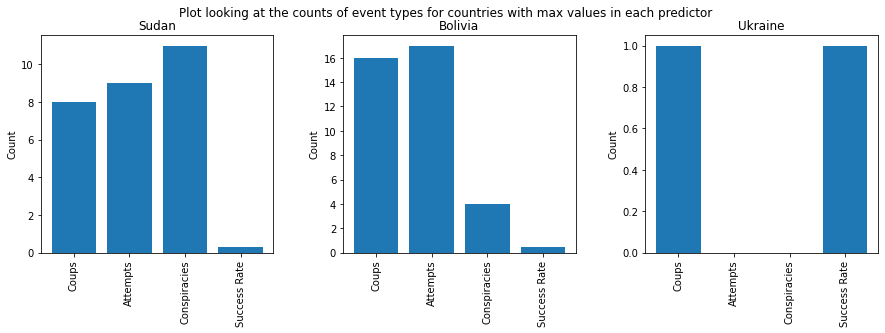

In [16]:
fig, axs = plt.subplots(1,3, figsize = (15, 4))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axs = axs.flatten()

ind = [0,1,2,3]
countries_plot = ['Sudan', 'Bolivia', 'Ukraine']
plt.suptitle("Plot looking at the counts of event types for countries with max values in each predictor", fontsize = 12)
for i in range(0,3):
    axs[i].bar(ind,country_df.loc[countries_plot[i]])
    axs[i].set_title(countries_plot[i])
    axs[i].set_ylabel("Count")
    axs[i].set_xticklabels(['','Coups', 'Attempts', 'Conspiracies', 'Success Rate'], rotation = 'vertical')

### Now we are going to run a similar process for Year
First, I will create a dictionary to store all the coups, attempts and conspiracies for each year. Then I will convert it into a panda's data frame to further look at the data and create a success rate. 

In [17]:
year = list(coup_df.year.unique())
len(year) 

74

In [18]:
year_dict = {}

for i in year:
    year_dict[i] = [0,0,0]

for j in range(len(coup_df)):
    if coup_df.realized[j] == 1:
        year_dict[coup_df.year[j]][0] += 1
    if coup_df.attempt[j] == 1:
        year_dict[coup_df.year[j]][1] += 1
    if coup_df.conspiracy[j] == 1:
        year_dict[coup_df.year[j]][2] += 1

In [19]:
year_df = pd.DataFrame.from_dict(year_dict, orient = 'index')
columns = year_df.columns = ["Coups", "Attempts", "Conspiracies"]
rate_success = round(year_df['Coups']/(year_df.sum(axis = 1)),2)
year_df["Success_rate"] = rate_success
names = year_df.index
year_df.head()

,Coups,Attempts,Conspiracies,Success_rate
2014,3,3,0,0.5
2015,2,1,2,0.4
2006,2,2,6,0.2
2011,2,2,1,0.4
2013,1,3,1,0.2


In [20]:
most_coups_yr = year_df['Coups'].idxmax()
most_attempts_yr = year_df['Attempts'].idxmax()
most_consp_yr = year_df['Conspiracies'].idxmax()
best_rate_yr = year_df['Success_rate'].idxmax()

print(f"Year with most conspiracies at {year_df['Conspiracies'].max()}: ",most_consp_yr) 
print(f"Year with most attempts at {year_df['Attempts'].max()}:", most_attempts_yr) 
print(f"Year with most Coups at {year_df['Coups'].max()}: ", most_coups_yr)
print(f"Year with the best success rate at {year_df['Success_rate'].max()}:", best_rate_yr) 

Year with most conspiracies at 7:  1962
Year with most attempts at 12: 1977
Year with most Coups at 18:  1979
Year with the best success rate at 1.0: 1945


<ipython-input-21-ac24d438d480>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(['','Coups', 'Attempts', 'Conspiracies', 'Success Rate'], rotation = 'vertical')


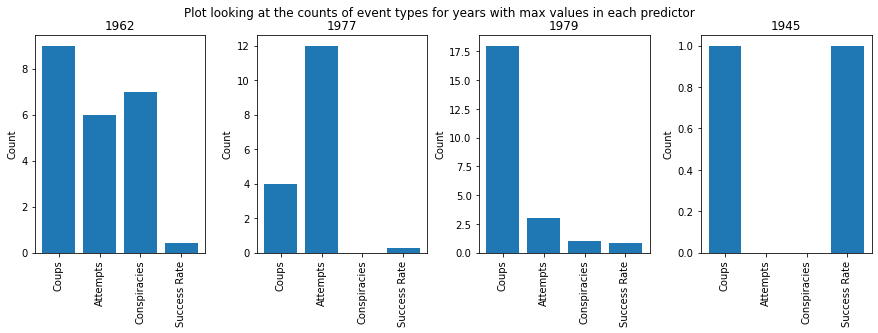

In [21]:
fig, axs = plt.subplots(1,4, figsize = (15, 4))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
axs = axs.flatten()

ind = [0,1,2,3]
year_plot = [1962, 1977, 1979, 1945]
plt.suptitle("Plot looking at the counts of event types for years with max values in each predictor", fontsize = 12)
for i in range(0,4):
    axs[i].bar(ind,year_df.loc[year_plot[i]])
    axs[i].set_title(year_plot[i])
    axs[i].set_ylabel("Count")
    axs[i].set_xticklabels(['','Coups', 'Attempts', 'Conspiracies', 'Success Rate'], rotation = 'vertical')

# Model selection:

In this section we are trying to answer the question of: what are the relevant variables? What are the relevant variables to predict the success (`realized` variable) of a coup?

We will try to use Lasso as also our own understanding of the variables for which are best to select or not. 
The questions we will answer here are: ccording to lasso, which variables are more relevant to predict the success of a coup or not? Do we agree with this selection?

### Lasso

To aid our model-selection process, we will use Lasso. Lasso (L1 penalization) can be used as model selection instrument, because it's penalization term can send predictor coefficients to 0. 

$$ L1 = \lambda \sum_{j=0}^{M}|W_j|$$

The predictors' coefficients that are 0 show that those predictors are not significant, according to lasso, thereby doing model selection. 

### Variables pre-selection before applying Lasso

Before even doing my model selection with Lasso, I am dropping:

- `country`: because it is a string, and because the `cowcode` already includes this information where each country has a code
- `coup_id`: because it is a code, it is a unique string id to each single different coup
- `event_type`: because it is already included in the columns `unrealised`, `realised`, `conspiracy`, `attempt`
- `unrealised`: because it is the opposite of realised. Unrealised is a perfect linear combination of the `realised` column. Consequently, they both explain the same. Which means that including this in my x matrix as a predictor would be 'cheating' in my prediction. Hence this will be dropped. Additionally, see perfect linear correlation between realised and unrealized in the correlation matrix below.

Additionally, we will drop:
- `attempt` 
- `conspiracy` 

We remove the  `attempt` and `conspiracy` predictors, because they are a linear combination with the predictor y. Being that the predictor `unrealised` is a perfect linear combination of the predictor `realised`, and that the predictor `unrealised` expresses the conspiracies and the attempts, we are dropping `attempt` and `conspiracy` predictors, to ensure we are avoiding **collinearity**. If we kept them in our analysis, the prediction would be nearly perfect, as these already give away the answer whether a coup was successful or not. 

See the correlation matrix below. `unrealized` has 0.4 correlation with  `conspiracy` and 0.6 correlation with `attempt`. Hence, if we dropped `unrealized`, we also should have dropped `conspiracy` and `attempt`, as they are all correlated and they all explain the same.




In [22]:
coup_df.corr()

,cowcode,year,month,day,unrealized,realized,conspiracy,attempt,military,dissident,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
cowcode,1.000000,0.219607,-0.036307,-0.000006,-0.029497,0.029497,0.035189,-0.056172,-0.012795,-0.029959,...,-0.029484,0.034915,-0.074084,0.052356,0.055911,0.007654,0.005674,0.072603,0.013239,-0.099683
year,0.219607,1.000000,-0.063125,-0.033224,0.061064,-0.061064,0.037107,0.032511,-0.014273,-0.022681,...,-0.041230,0.022139,0.023389,-0.002502,-0.029821,0.025119,0.062784,0.099818,0.001007,-0.059096
month,-0.036307,-0.063125,1.000000,-0.012632,-0.020131,0.020131,-0.010843,-0.015427,0.017322,-0.067967,...,-0.004603,0.001291,0.009963,0.013701,-0.027098,0.012430,0.006664,0.009243,-0.038618,-0.004942
day,-0.000006,-0.033224,-0.012632,1.000000,-0.004022,0.004022,-0.008396,0.001957,0.038717,0.024338,...,-0.004288,0.000341,-0.003564,0.011768,0.009738,-0.015171,0.052455,-0.002910,0.014325,0.008590
unrealized,-0.029497,0.061064,-0.020131,-0.004022,1.000000,-1.000000,0.442406,0.673799,0.006627,0.485467,...,-0.066981,0.051281,0.133946,0.028852,-0.164608,-0.174996,-0.245428,-0.093248,-0.305627,-0.232727
realized,0.029497,-0.061064,0.020131,0.004022,-1.000000,1.000000,-0.442406,-0.673799,-0.006627,-0.485467,...,0.066981,-0.051281,-0.133946,-0.028852,0.164608,0.174996,0.245428,0.093248,0.305627,0.232727
conspiracy,0.035189,0.037107,-0.010843,-0.008396,0.442406,-0.442406,1.000000,-0.361770,-0.111226,0.448848,...,-0.031560,0.068098,0.108529,-0.042148,-0.101230,-0.097098,-0.112868,-0.050457,-0.142222,-0.111624
attempt,-0.056172,0.032511,-0.015427,0.001957,0.673799,-0.673799,-0.361770,1.000000,0.101092,0.131994,...,-0.043363,-0.002587,0.049432,0.064876,-0.087408,-0.101630,-0.161820,-0.055216,-0.200130,-0.149642
military,-0.012795,-0.014273,0.017322,0.038717,0.006627,-0.006627,-0.111226,0.101092,1.000000,-0.265705,...,0.011321,-0.068161,0.000099,-0.003760,0.042072,0.097540,0.083922,0.022591,-0.079190,0.001378
dissident,-0.029959,-0.022681,-0.067967,0.024338,0.485467,-0.485467,0.448848,0.131994,-0.265705,1.000000,...,-0.024970,0.005460,0.056688,0.026518,-0.050384,-0.114970,-0.126551,-0.043258,-0.160188,-0.124708


## Exploration of potentially problematic predictors

Based off of the definition of these predictors from the codebook, we think that certain predictors might give away the response. For example, killed has the description "A dummy variable where one indicates the deposed executive was killed during the coup event and zero otherwise." This essentially means that there was a coup because the executive was removed. We plan to create a sub-dataframe to look at only successful coups and see what the means are of these predictors. The mean will show us how prevelant each predictor in relation to success. We plan to remove these predictors in further EDA exploration for this milestone and for creating our baseline model. 

For the final project, we can do deeper analysis of these terms to see how they affect our model or if we can use them for interaction terms. We can even see what happens when we do add these to our model or use other methods to explore what these mean.

List of Potentially problematic predictors and their variables:
- `auto` - A dummy variable where one indicates an auto coup and zero otherwise.
- `resign` - A dummy variable where one indicates a forced resignation and zero otherwise
- `popular` - A dummy variable where one indicates a popular revolt and zero otherwise.
- `counter` - A dummy variable where one indicates a counter-coup and zero otherwise.
- `other` - A dummy variable where one indicates the coup event does not fit into any of the above categories or the actors were not identified and zero otherwise.
- `noharm` - A dummy variable where one indicates the deposed executive was not harmed during the coup event and zero otherwise.
- `injured` - A dummy variable where one indicates the deposed executive was injured during the coup event and zero otherwise.
- `killed` -  A dummy variable where one indicates the deposed executive was killed during the coup event and zero otherwise.
- `harrest` - A dummy variable where one indicates the deposed executive was placed under house arrest and zero otherwise.
- `jailed` -  A dummy variable where one indicates the deposed executive was jailed and zero otherwise.
- `tried` - A dummy variable where one indicates the deposed executive was tried and zero otherwise.
- `fled` - A dummy variable where one indicates the deposed executive fled the country and zero otherwise.
- `exile` - A dummy variable where one indicate the deposed executive was banished from the country and zero otherwise.

### Naive Numerical Reasoning for Removing above dataset

While we feel that we could remove the above predictor list based off of their definitions, we wanted to do some additional exploration. In the next cell, I create two new data frames that just store all the rows for a successful coup and the other for an unsuccessful coup. We also seperated noharm from the other predictors because we saw that it was actually in nearly all the columns for both unsuccessful and successful. In our findings, noharm shows up in 94% of all rows of the dataset and because of this we plan to remove it from our baseline model testing. 

When looking at the rest of the predictors, we summed across all columns to see whether or not there must always be one of those problematic predictors for a coup to exist. We do this for both the successful and unsuccessful dataframes. We then count the amount of nonzero items meaning that there is a presence of at least one of those variables to analyze how prevelant the total group of predictors are in affecting the success or unsuccess of a coup. Our initial assumptions were that the presence of at least one problematic predictors will indicate that there is a success, and our findings show 70% of successes have at least one of those predictors. For the unsuccessful data, at least one of these predictors show up in 11% of the observations. We took these percentages and decided that a 70% correlation of these predictors to successs compared to 11% to unsuccess is pretty high and calls for removal in further exploration of our baseline.

In our next phase of work, we can do further analysis of these specific predictors and decide whether or not to keep them. We can create iteraction terms of each combination of these predictors and look at the collinearity matrix.

In [23]:
success_df = coup_df[coup_df['realized']==1 ]
unsuccess_df = coup_df[coup_df['realized']==0 ]

print("Looking at the presence of noharm across the entire coup_df")
noharm = coup_df['noharm']
noharm_nonzero = np.count_nonzero(noharm)
print("Noharm total length:", len(noharm))
print("Amount of nonzero items in the series: ", noharm_nonzero)
per_noharm = (noharm_nonzero/len(noharm))*100
print("The percent of columns noharm is present (value = 1): ",round(per_noharm,2),"%")

problem_df = success_df[['killed', 'exile','injured', 'harrest', 'jailed'
, 'tried', 'fled', 'auto', 'resign', 'popular', 'counter', 'other']]
col_vector = problem_df.sum(axis =1)
non_zeros = np.count_nonzero(col_vector)
print("\n We are creating a masked dataframe to see how certain predictors affect successful coups")
print("Column Vector length for successful coups",len(col_vector))
print("Amount of non zero values in the column vector:",non_zeros)
print("The percent of columns where at least one of the problematic predictors are present")
mean = round(non_zeros/len(col_vector),2)*100
print("(value = 1) in the success dataframe: ",mean, "%")

problem_df_opp = unsuccess_df[['killed', 'exile','injured', 'harrest', 'jailed'
, 'tried', 'fled', 'auto', 'resign', 'popular', 'counter', 'other']]
col_vector_un = problem_df_opp.sum(axis =1)
# problem_df_opp.head()
non_zeros_un = np.count_nonzero(col_vector_un)
print("\nWe are creating a masked dataframe to see how certain predictors affect unsuccessful coups")
print("Column Vector length for unsuccessful coups: ",len(col_vector_un))
print("Amount of nonzero terms in above column vector:",non_zeros_un)
print("The percent of columns where at least one of the problematic predictors are present")
mean_un = round(non_zeros_un/len(col_vector_un),3)*100
print("(value = 1) in the unsuccessful dataframe: ",mean_un,"%")


Looking at the presence of noharm across the entire coup_df
Noharm total length: 943
Amount of nonzero items in the series:  889
The percent of columns noharm is present (value = 1):  94.27 %

 We are creating a masked dataframe to see how certain predictors affect successful coups
Column Vector length for successful coups 426
Amount of non zero values in the column vector: 300
The percent of columns where at least one of the problematic predictors are present
(value = 1) in the success dataframe:  70.0 %

We are creating a masked dataframe to see how certain predictors affect unsuccessful coups
Column Vector length for unsuccessful coups:  517
Amount of nonzero terms in above column vector: 59
The percent of columns where at least one of the problematic predictors are present
(value = 1) in the unsuccessful dataframe:  11.4 %


From these mean values we can see that the variables `noharm` , `kill`, `resign`, `exile`, `jailed` and `fled` might be giving away the answer altogether. Given this, we will not select these initally for our baseline model.

### Cowcodes instead of using countries

In [24]:
coup_df_selected = coup_df.copy()
coup_df_selected = coup_df_selected.drop(columns = ['country', 'coup_id', 'event_type', 'unrealized'])
y = coup_df_selected['realized']
x = coup_df_selected.drop(columns = 'realized')
predictors_list = x.columns.values.tolist()
#predictors_list

In [25]:
coup_df['cowcode'].unique
cowcodes_countries = pd.DataFrame()
cowcodes_countries['country'] = coup_df['country']
cowcodes_countries['cowcode'] = coup_df['cowcode']
cowcodes_countries.shape
cowcodes_countries = cowcodes_countries.drop_duplicates(subset=['cowcode'])
print(f"We have {cowcodes_countries.shape[0]} cowcodes.")

We have 134 cowcodes.


In [26]:
countries = pd.DataFrame()
countries['country'] = coup_df['country']
countries['cowcode'] = coup_df['cowcode']
countries = countries.drop_duplicates(subset=['country'])
print(f"We have {countries.shape[0]} countries.")

#countries

We have 136 countries.


We have 136 countries and 134 cowcodes, because the person inputing the data did a mistake in inputing the name of the country - they named the same country with the according name in different languages.

The countries that has cowcodes in common are: Cote d'Ivoire and Ivory coast (cowcode 437) and Kyrgyzstan and Kyrgyz Republic (code 703). 
Essentially, these are the same country, simply imputed with different names. 

Consequently, we actually 134 countries and not 136. 

Hence we will keep cowcodes as variable to indicate the country.



In [27]:
code_437 =countries[ countries['cowcode']  == 437]
print(code_437)

code_703 =countries[ countries['cowcode']  == 703]
print(code_703)

ivory = coup_df.iloc[48]
ivoire = coup_df.iloc[276]

kyrgyzstan = coup_df.iloc[39]
kyrgyz_republic = coup_df.iloc[517]

           country  cowcode
48     Ivory Coast      437
276  Cote d'Ivoire      437
             country  cowcode
39        Kyrgyzstan      703
517  Kyrgyz Republic      703


## Here we start applying Lasso.

#### Code structure:

* first, we do train/test split
* then we cross validate to find the best hyper paramenter lambda
* then we apply Lasso and check the coefficients with `.coef_` and check which ones were sent to 0

#### Variables: 

As said above, we will first drop `country`, `coup_id`, `event_type`, `unrealized`, `attempt`, `conspiracy` for the aforementioned reasons. 


Additionally, we want to also drop `auto`, `resign`, `popular`, `killed`, `exile`, `injured`, `noharm`, `arrest`, `counter`, `other`, `jailed`, `tried`, `fled` because we think that when these variables are 1 they basically give away the answer of the fact that the coup was successful. 

However, we refrain to drop them for a moment, as we are curious to look at their coefficients in case we applied lasso. We expect these either to be dropeed by Lasso (coefficient 0) or to dominate over the other remaining variables - indicating that indeed these would explain almost directly whether the coup was successful or not. 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=31)

In [29]:
# dropping country, coup_id, event_type, unrealized, attempt, conspiracy

coup_df_selected = coup_df.copy()
coup_df_selected = coup_df.drop(columns = ['country', 'coup_id', 'event_type', 'unrealized', 'attempt', 'conspiracy'])

y = coup_df_selected['realized']
x = coup_df_selected.drop(columns = 'realized')
predictors_selected = x.columns.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=31)
scores_dictionaries = {}

In [30]:
cross_validation_error = []
lambda_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
for lam in lambda_list:
    lasso_reg = Lasso(alpha=lam)
    lasso_reg.fit(x_train, y_train)

    mse_score = cross_validate(lasso_reg, x_train,y_train, scoring =
     "neg_mean_squared_error", cv = 10, return_train_score= False) #false

    cross_validation_error.append(mse_score["test_score"].mean()*-1) #we need positive numbers, this is the validation score

min_cross_val_mse = min(cross_validation_error)
best_cross_val_lambda_index = cross_validation_error.index(min_cross_val_mse)
best_cross_val_lambda = lambda_list[best_cross_val_lambda_index]
print(f"This is the best lambda after cross validation: {best_cross_val_lambda}")

lasso_reg = Lasso(alpha=best_cross_val_lambda)
lasso_reg.fit(x_train, y_train)
intercept = lasso_reg.intercept_
coef = lasso_reg.coef_

unselected_predictors = []
selected_predictors = []

print("These are the predictors that Lasso considered useful:")
print("-------------------------------------------------------")
for i in range(len(predictors_selected)):
    if coef[i] == 0 or coef[i] == -0.000:
        unselected_predictors.append(predictors_selected[i])
    else:

        selected_predictors.append(predictors_selected[i])
        print(f"{predictors_selected[i]} coefficient: {coef[i]:.5f}")
print("-------------------------------------------------------")
print(f"Intercept: {intercept:.3f}")
print("-------------------------------------------------------")
print(f"These predictors are considered not useful from Lasso: {unselected_predictors}")


This is the best lambda after cross validation: 0.001
These are the predictors that Lasso considered useful:
-------------------------------------------------------
cowcode coefficient: 0.00001
year coefficient: -0.00143
month coefficient: 0.00356
day coefficient: 0.00008
military coefficient: -0.01403
dissident coefficient: -0.33654
palace coefficient: 0.19917
foreign coefficient: -0.00290
auto coefficient: 0.36371
resign coefficient: 0.21465
popular coefficient: 0.19709
counter coefficient: 0.12406
noharm coefficient: 0.09394
killed coefficient: 0.43752
harrest coefficient: 0.32851
jailed coefficient: 0.42927
tried coefficient: -0.24015
fled coefficient: 0.46667
exile coefficient: 0.44450
-------------------------------------------------------
Intercept: 3.087
-------------------------------------------------------
These predictors are considered not useful from Lasso: ['rebel', 'other', 'injured']


Lasso considers the variables `rebel`, `other`, `injured` as not relevant. 



We agree with the dropping of `other`, becase as we can see below, it is 1 only when `unrealized` is 1.

In [31]:
test_df = coup_df[coup_df['other']==1]
test_df

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
567,55303262001,553,Malawi,2001,3,26,conspiracy,1,0,1,...,0,1,1,0,0,0,0,0,0,0
572,78109101983,781,Maldives,1983,9,10,conspiracy,1,0,1,...,0,1,0,0,0,0,0,0,0,0
575,43208121969,432,Mali,1969,8,12,attempted,1,0,0,...,0,1,1,0,0,0,0,0,0,0


As expected, we can see that `auto`, `resign`, `popular`, `killed`, `exile`, `noharm`, `harrest`, `counter`, `other`, `tried`, `fled` coefficients are dominating over the remaining variables of `cowcode`, `year`, `month`, `day`, `military`, `dissident`, `palace`, `foreign`, `noharm`.

Hence, we consider to keep only: `cowcode`, `year`, `month`, `day`, `military`, `dissident`, `palace`, `foreign`.

## Baseline model

We think that these variables should be exluded : `country`, `coup_id`, `event_type`, `unrealized`, `attempt`, `conspiracy` because of collinearity and other reasons explained above. 

Additionally, also `auto`, `resign`, `popular`, `killed`, `exile`, `noharm`, `harrest`, `counter`, `other`, `tried`, `fled`, `injured` , `jailed` might be giving away the `realized` variable. 

Lasso considers these to be excluded: `others`, `rebel`, `injured`.

The 9 variables left to used in our modelling are: `cowcode`, `year`, `month`, `day`, `military`, `dissident`, `palace`, `foreign`.   

#### Interaction terms

In this notebook for this milestone we are not exploring cross-terms (interaction terms). This will be done for the next milestone.

In [35]:
drop_list = ['country', 'coup_id', 'event_type', 'unrealized', 'attempt', 'conspiracy', 'auto', 'resign', 
            'popular', 'killed', 'exile', 'injured', 'harrest', 'counter', 'other', 'tried',  'fled', 
             'injured', 'rebel', 'jailed', 'noharm']
coup_df_selection = coup_df.copy()
coup_df_selection = coup_df.drop(columns = drop_list)

y = coup_df_selection['realized']
x = coup_df_selection.drop(columns = 'realized')
predictors_selection = x.columns.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=31)
scores_dictionaries = {}
x

,cowcode,year,month,day,military,dissident,palace,foreign
0,439,2014,10,30,1,0,0,0
1,516,2015,5,13,1,0,0,0
2,483,2006,4,13,0,1,0,0
3,651,2011,2,11,1,0,0,0
4,651,2013,7,3,1,0,0,0
...,...,...,...,...,...,...,...,...
938,551,1981,6,14,0,1,0,0
939,551,1988,10,7,1,1,0,0
940,551,1990,6,30,1,0,0,0
941,551,1997,10,28,1,0,0,0


In [36]:
logistic = LogisticRegression(penalty = 'none', max_iter = 150)
logistic.fit(x_train,y_train)
logistic.intercept_
y_pred_test = logistic.predict(x_test)
y_pred_train = logistic.predict(x_train)

train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100 


print(f"The training score is {train_score}")
print(f"The testing score is {test_score}")

scores_dictionaries["Logistic Regression test score"] = test_score

The training score is 70.0
The testing score is 68.55123674911661


In [38]:
Cs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
cv = 10


logit_lasso = LogisticRegressionCV(Cs= Cs, cv=cv, penalty='l1', solver = 'liblinear', max_iter = 5000).fit(x_train, y_train)
y_pred_test = logit_lasso.predict(x_test)
y_pred_train = logit_lasso.predict(x_train)

train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100 

scores_dictionaries["Lasso Regression test score"] = test_score

print(f"The training score is {train_score}")
print(f"The testing score is {test_score}")
print("-------------------------------------------------------")

intercept = logit_lasso.intercept_
coef = logit_lasso.coef_

unselected_predictors = []
selected_predictors = []
print("-------------------------------------------------------")

print("These are the predictors that Lasso considered useful:")
print("-------------------------------------------------------")
for i in range(len(predictors_selection)):
    if coef[0][i] == 0:
        unselected_predictors.append(predictors_selection[i])
    else:

        selected_predictors.append(predictors_selection[i])
        print(f"{predictors_selection[i]} coefficient: {coef[0][i]:.3f}")
print("-------------------------------------------------------")
print(f"Intercept: {intercept[0]:.3f}")
print("-------------------------------------------------------")
print(f"These predictors are considered not useful from Lasso: {unselected_predictors}")

The training score is 73.03030303030303
The testing score is 71.73144876325088
-------------------------------------------------------
-------------------------------------------------------
These are the predictors that Lasso considered useful:
-------------------------------------------------------
cowcode coefficient: -0.000
year coefficient: -0.009
month coefficient: -0.010
day coefficient: 0.004
military coefficient: -0.621
dissident coefficient: -3.087
palace coefficient: 0.983
foreign coefficient: 0.072
-------------------------------------------------------
Intercept: 18.214
-------------------------------------------------------
These predictors are considered not useful from Lasso: []


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2, interaction_only = True, include_bias=False)
interaction_train = (poly.fit_transform(x_train))
#print(f"We have {interaction_train.shape[1]} interaction terms")
interaction_test = (poly.fit_transform(x_test))
print(f"Although we have only {len(selected_predictors)} predictors, we still can have {interaction_test.shape[1]} possible interaction terms to explore")



Although we have only 8 varaibles, we still can have 36 possible interaction terms to explore


In [40]:
cv = 10
logit_lasso_interact = LogisticRegressionCV(Cs = Cs, cv = cv, penalty = 'l1', solver = 'liblinear', max_iter = 1000 )
logit_lasso_interact.fit(interaction_train, y_train)

y_pred_train = logit_lasso_interact.predict(interaction_train)
y_pred_test = logit_lasso_interact.predict(interaction_test)

accuracy_train_int = accuracy_score(y_train, y_pred_train)*100
accuracy_test_int = accuracy_score(y_test, y_pred_test)*100


intercept = logit_lasso_interact.intercept_
coef = logit_lasso_interact.coef_
#print(f" Here are the coefficients of the model: {coef}")
#print(f"Here is the intercept: {intercept}")
print(f"Here is the accuracy score from the train data: {accuracy_train_int:.3f}%")
print(f"Here is the accuracy score from the test data: {accuracy_test_int:.3f}%")

#coef.shape
#len(coef[0])

Here is the accuracy score from the train data: 73.636%
Here is the accuracy score from the test data: 65.371%


In [41]:
scores_dictionaries["Logistic RegressionCV test score"] = accuracy_test_int

In [42]:
scores_dictionaries

{'Logistic Regression test score': 68.55123674911661,
 'Lasso Regression test score': 71.73144876325088,
 'Logistic RegressionCV test score': 65.37102473498233}

# Further modelling




## Random Forest

Given that our response variable indicates a success or a lack of success, we can try to use classification trees to predict it. 

In the following steps we will apply Random Forest (a form of bagging, i.e. from high variance/low bias as starting point) and Adaboost (a form of boosting, i.e. from high bias and low varias as starting point).

We will tune our models on validation. 

At the end we will check which model better predicts our training dataset with the given 9 selected variables `cowcode`, `year`, `month`, `day`, `military`, `dissident`, `palace`, `foreign`, `noharm`.   



In [44]:
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

scores_list=[]
cv_scores = []
cvmeans = []
cvstds = []

for i in range(1,23):
    dtree = DecisionTreeClassifier(max_depth=i, random_state = i)
    dtree.fit(x_train, y_train)
    scores_list.append(dtree.score(x_train,y_train))
    cs = cross_val_score(dtree, x_train, y_train, cv = 5) 
    cv_scores.append(cs)
    
for j in cv_scores:
    cvmeans.append(j.mean())
    cvstds.append(j.std())


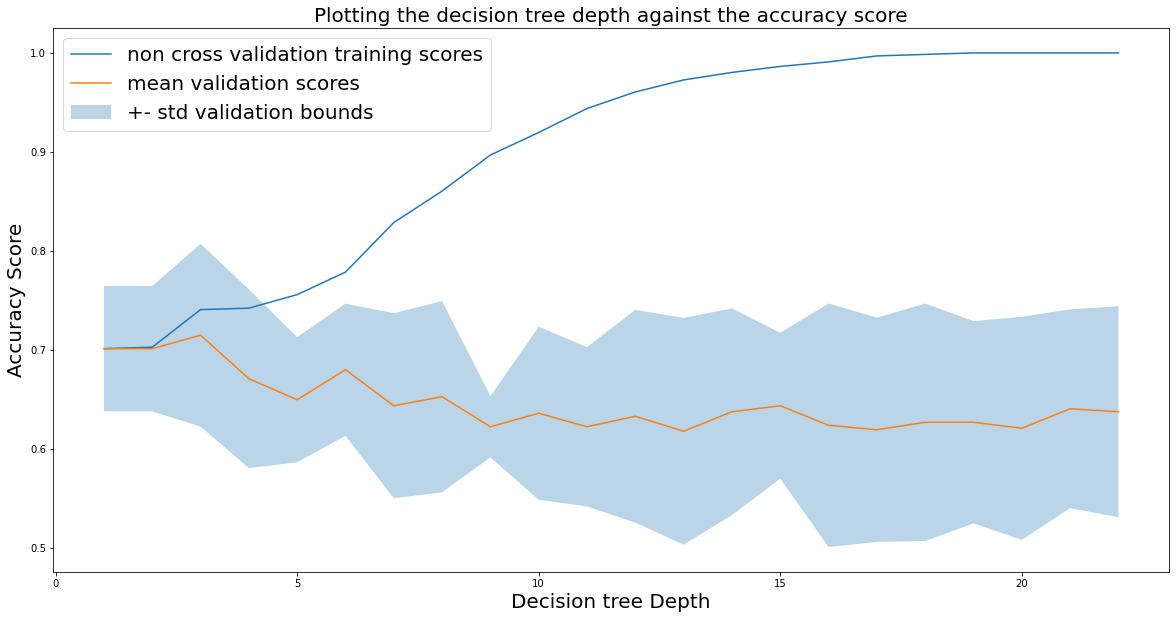

In [45]:
plt.figure(figsize=(20,10))
plt.plot(np.linspace(1,22,22), scores_list, label="non cross validation training scores")
plt.plot(np.linspace(1,22,22), cvmeans, label="mean validation scores")
means_array=np.asarray(cvmeans)
std_array = np.asarray(cvstds)
plt.fill_between(np.linspace(1,22,22), (means_array - 2*std_array) , ( means_array + 2*std_array), label="+- std validation bounds", alpha = 0.3) #fill between 
plt.title("Plotting the decision tree depth against the accuracy score", size = 20)
plt.ylabel("Accuracy Score", size = 20)
plt.xlabel("Decision tree Depth", size = 20)
plt.legend(fontsize = 20)
plt.show()



In [48]:
# the best depth is the one that maximises the accuracy cvmeans
lowest_accuracy = min(cvmeans)
worst_depth = cvmeans.index(lowest_accuracy)+1 #this is the best depth, which is 5
print("The worst depth is the depth that minimizes the accuracy, this is the depth of : ", worst_depth,". This depth leads to the accuracy of:", round(lowest_accuracy*100), "%")

new_tree = DecisionTreeClassifier(max_depth=worst_depth)
new_tree.fit(x_train,y_train)
worst_cv_tree_train_score = new_tree.score(x_train, y_train)
worst_cv_tree_test_score = new_tree.score(x_test, y_test)

print(f"The accuracy on the training dataset of the decision tree with the worst depth of {worst_depth} is {worst_cv_tree_train_score:.4f}")
print(f"The accuracy on the testing dataset of the decision tree with the worst depth of {worst_depth} is {worst_cv_tree_test_score:.4f}")

The worst depth is the depth that minimizes the accuracy, this is the depth of :  13 . This depth leads to the accuracy of: 62 %
The accuracy on the training dataset of the decision tree with the worst depth of 13 is 0.9727
The accuracy on the testing dataset of the decision tree with the worst depth of 13 is 0.6466


In [50]:
# your code here

# the best depth is the one that maximises the accuracy cvmeans
highest_accuracy = max(cvmeans)
best_depth = cvmeans.index(highest_accuracy)+1 #this is the best depth, which is 5
print("The best depth is the depth that maximises the accuracy, this is the depth of : ", best_depth,". This depth leads to the accuracy of : ", round(highest_accuracy*100), "%")

new_tree = DecisionTreeClassifier(max_depth=best_depth)
new_tree.fit(x_train,y_train)
best_cv_tree_train_score = new_tree.score(x_train, y_train)
best_cv_tree_test_score = new_tree.score(x_test, y_test)

print(f"The accuracy on the training dataset of the decision tree with the best depth of {best_depth} is {best_cv_tree_train_score:.4f}")
print(f"The accuracy on the testing dataset of the decision tree with the best depth of {best_depth} is {best_cv_tree_test_score:.4f}")



The best depth is the depth that maximises the accuracy, this is the depth of :  3 . This depth leads to the accuracy of :  72 %
The accuracy on the training dataset of the decision tree with the best depth of 3 is 0.7409
The accuracy on the testing dataset of the decision tree with the best depth of 3 is 0.7279


In [54]:
# your code here
forest = RandomForestClassifier(max_depth = worst_depth, n_estimators = 100) #, random_state=2)  #number of tree is the number of estimators
forest.fit(x_train, y_train)

random_forest_train_score = forest.score(x_train, y_train)
random_forest_test_score = forest.score(x_test, y_test)

print(f"The random forest train score is : {round(random_forest_train_score*100,1)}")
print(f"The random forest test score is : {round(random_forest_test_score*100,1)}")

scores_dictionaries[f"Random Forest with 100 trees and depth {worst_depth} test score"] = random_forest_test_score*100


The random forest train score is : 99.8
The random forest test score is : 69.6


In [55]:
count_list_features = []
count_list_features = [0] * len(x_train.columns.values.tolist())
for i in range(len(forest.estimators_)):
    for j in range(len(count_list_features)):
        forest.estimators_[j].tree_.feature[0]
        if forest.estimators_[i].tree_.feature[0] == j:
            count_list_features[j] +=1
     

In [56]:
count_features = pd.DataFrame()
count_features['predictors'] = x_train.columns.values.tolist()
count_features['how many times this feature was the top node in Random forest'] = count_list_features

sorted_count = count_features.sort_values(by='how many times this feature was the top node in Random forest', ascending=False)
sorted_count

,predictors,how many times this feature was the top node in Random forest
6,palace,23
5,dissident,20
1,year,17
3,day,17
0,cowcode,10
2,month,7
7,foreign,4
4,military,2


### Adaboost classifier

In [57]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV




Here we split the training dataset on train_val and validation.

For the next milestone we will apply Cross Validation to select the beset hyper paramenters for Adaboost.

In the next milestone we will use GridSearchCV to find the best depth and number of estimators for the AdaBoostClassifier.

For now, we simply do validation by splitting one our training dataset.

In [58]:

x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=31)


In [60]:
import warnings
warnings.simplefilter("ignore", UserWarning)

scores_train_ada = []
scores_test_ada = []

for i in range(1, 10):
    boost= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), algorithm = 'SAMME.R', learning_rate = 0.05, n_estimators = 800)
    boost.fit(x_train_val, y_train_val)
    scores_train_iteration = list(boost.staged_score(x_train_val, y_train_val))
    scores_test_iteration = list(boost.staged_score(x_val, y_val))
    scores_train_ada.append(scores_train_iteration)
    scores_test_ada.append(scores_test_iteration)





In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (40, 15))
fig.subplots_adjust(hspace=.5, wspace=0.3)
axs = axs.flatten()

plt.suptitle("Plot showing the train and test datasets cumulative score for 800 iterations with depth from 1 to 9", size = 30)

for i in range(0,9):
    axs[i].plot(np.linspace(1, 800, 800), scores_test_ada[i], label = "cumulative accuracy scores for the test dataset" )
    axs[i].plot(np.linspace(1, 800, 800), scores_train_ada[i], label = "cumulative accuracy scores for the train dataset")
    axs[i].legend(fontsize = 15)
    axs[i].set_xlabel("Iterations from 1 to 800")
    axs[i].set_ylabel("cumulative accuracies")
    axs[i].set_title(f"Plot showing the train and test datasets cumulative score for 800 iterations with depth {i+1}", fontsize = 20)




In [ ]:
test_depth1 = scores_test_ada[0]
test_depth2 = scores_test_ada[1]
test_depth3 = scores_test_ada[2]
test_depth4 = scores_test_ada[3]
test_depth5 = scores_test_ada[4]
test_depth6 = scores_test_ada[5]
test_depth7 = scores_test_ada[6]
test_depth8 = scores_test_ada[7]
test_depth9 = scores_test_ada[8]


train_depth1 = scores_train_ada[0]
train_depth2 = scores_train_ada[1]
train_depth3 = scores_train_ada[2]
train_depth4 = scores_train_ada[3]
train_depth5 = scores_train_ada[4]
train_depth6 = scores_train_ada[5]
train_depth7 = scores_train_ada[6]
train_depth8 = scores_train_ada[7]
train_depth9 = scores_train_ada[8]


highest_test_score_depth1 = max(test_depth1)
best_n_trees1 = test_depth1.index(highest_test_score_depth1)+1 
train_score_depth1 = train_depth1[best_n_trees1]

highest_test_score_depth2 = max(test_depth2)
best_n_trees2 = test_depth2.index(highest_test_score_depth2)+1 
train_score_depth2 = train_depth1[best_n_trees2]

highest_test_score_depth3 = max(test_depth3)
best_n_trees3 = test_depth3.index(highest_test_score_depth3)+1 
train_score_depth3 = train_depth1[best_n_trees3]

highest_test_score_depth4 = max(test_depth4)
best_n_trees4 = test_depth4.index(highest_test_score_depth4)+1 
train_score_depth4 = train_depth1[best_n_trees4]

highest_test_score_depth5 = max(test_depth5)
best_n_trees5 = test_depth5.index(highest_test_score_depth5)+1 
train_score_depth5 = train_depth1[best_n_trees5]

highest_test_score_depth6 = max(test_depth6)
best_n_trees6 = test_depth6.index(highest_test_score_depth6)+1 
train_score_depth6 = train_depth1[best_n_trees6]

highest_test_score_depth7 = max(test_depth7)
best_n_trees7 = test_depth7.index(highest_test_score_depth7)+1 
train_score_depth7 = train_depth1[best_n_trees7]

highest_test_score_depth8 = max(test_depth8)
best_n_trees8 = test_depth8.index(highest_test_score_depth8)+1 
train_score_depth8 = train_depth1[best_n_trees8]

highest_test_score_depth9 = max(test_depth9)
best_n_trees9 = test_depth9.index(highest_test_score_depth9)+1 
train_score_depth9 = train_depth1[best_n_trees9]

score_table = pd.DataFrame()
score_table['depth'] = [1,2,3,4, 5, 6, 7, 8, 9]
score_table['highest validation accuracy']= [highest_test_score_depth1, highest_test_score_depth2, highest_test_score_depth3, highest_test_score_depth4, highest_test_score_depth5, highest_test_score_depth6, highest_test_score_depth7, highest_test_score_depth8, highest_test_score_depth9 ]
score_table['ideal amount of boosted trees']= [best_n_trees1, best_n_trees2, best_n_trees3, best_n_trees4, best_n_trees5, best_n_trees6, best_n_trees7, best_n_trees8, best_n_trees9]
score_table['training score']=[train_score_depth1, train_score_depth2, train_score_depth3, train_score_depth4, train_score_depth5, train_score_depth6, train_score_depth7, train_score_depth8, train_score_depth9]

score_table

Based on the validation score, we pick the best depth and ideal number of trees, hence we fit the ada model again. 

In [ ]:
validation_scores_list_ada = score_table['highest validation accuracy'].tolist()
iterations_list_ada = score_table['ideal amount of boosted trees'].tolist()


index_best_val_score = validation_scores_list_ada.index(max(validation_scores_list_ada))
best_ada_depth = index_best_val_score + 1
best_iterations = iterations_list_ada[index_best_val_score]
print(f"The depth that maximizes the validation score is {best_ada_depth}. The number of trees that maximizes the validation socre is {iterations_list_ada[index_best_val_score]} ")

In [ ]:
import statistics


ada_model_tuned = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=best_ada_depth), algorithm = 'SAMME.R', learning_rate = 0.05, n_estimators = best_iterations).fit(x_train, y_train)

y_pred_test = ada_model_tuned.predict(x_test)


ada_train_score = statistics.mean(list(ada_model_tuned.staged_score(x_train, y_train)))


ada_test_score= statistics.mean(list(ada_model_tuned.staged_score(x_test, y_test)))

print(f"The adamodel score in the train is {ada_train_score} ")
print(f"The adamodel score in the test is {ada_test_score} ")
#print(len(list(ada_train_score)))
#print(ada_test_score)

scores_dictionaries["Adaboost with depth 8 and 7 trees test score"]=ada_test_score


In [ ]:
scores_dictionaries

Based on test scores, the model that performs the best is the `LogisticRegression` model. Hence, from here onwards we will try to analyse the how different perdictors affect he likelihood of an attempt/conspiracy to be successful (i.e. to become an actual coup, `realized` = 1) or not.

## More logistic regression and likelihood analysis

## Further modelling

In this project we also want to use ensamble models. 

Our next step will be to use mixture of experts to combine different models and their predictions.

What we aim to do for the next milestone is to use ensemble methods and mixture of experts.

#### Ensemble methods
Ensemble methods takes into consideration models that can be both homogenous as etherogeneous. 

To do these, we will take into consideration the ones suggested in class among:
* majority voting
* weighting voting
* boosting, bagging (with homogeneous models)
* blending and stacking (across heterogeneous models)

#### Mixture of experts
Mixture of experts takes into consideration models that are heterogeneous. For the next milestone we will read papers about mixture of experts implement mixture of experts by using RF, Lasso, LogisticRegression, AdaBoost, and even more models if it will proove needed. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c03d1c0-0b1a-403a-ac67-323d25d826e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>